In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle


In [7]:
training_df = pd.read_csv('training_text.txt',sep=",")
training_df

,Event,Start to End,End to Start,Start to Start,End to End,Angle,Match
0,0,2.71886,13.33720,2.26287,12.62740,0.481085,1
1,1,14.84250,31.33690,42.44840,3.54655,2.870840,1
2,2,44.13210,30.93230,42.06060,32.99720,1.133930,1
3,3,251.95100,240.16100,251.28800,240.84700,1.513000,1
4,4,16.13930,3.66892,10.93150,5.88928,0.524564,1
...,...,...,...,...,...,...,...
511954,511954,47.80910,48.55890,51.25280,45.13910,2.858550,0
511955,511955,70.77800,66.48450,69.19890,68.06890,0.639063,0
511956,511956,96.45920,95.27460,97.98430,93.74930,2.807930,0
511957,511957,25.12540,23.22140,25.53730,22.84010,2.274880,0


In [8]:
X = training_df.loc[:,training_df.columns != "Match "]
y = training_df["Match "]

X = X.values
y = y.to_numpy()

In [9]:
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
predictions = model.predict(X_test)

True Positive(TP)  =  101281
False Positive(FP) =  26355
True Negative(TN)  =  221
False Negative(FN) =  133
Accuracy of the binary classification = 0.793


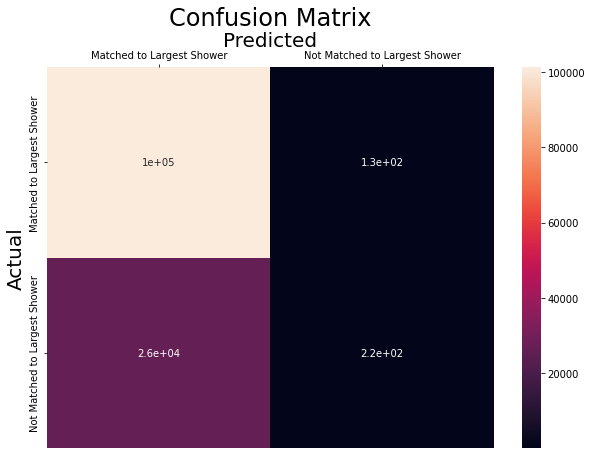

In [15]:
cm = confusion_matrix(y_test, predictions,labels=[1,0])

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

#cm = cm / np.sum(cm)
df_cm = pd.DataFrame(cm, index = ["Matched to Largest Shower","Not Matched to Largest Shower"],
                  columns = ["Matched to Largest Shower","Not Matched to Largest Shower"])

plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
ax.set_xlabel("Predicted",size=20)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

ax.set_ylabel("Actual",size=20)
ax.set_title("Confusion Matrix",size=24)
plt.show()

In [17]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [66]:
accuracy, precision, recall, matrices = {}, {}, {}, {}
for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)

    # save the model to disk
    filename = key+'.sav'
    pickle.dump(models[key], open(filename, 'wb')) 

    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    
    matrices[key] = confusion_matrix(y_test, predictions,labels=[1,0])

/home/rhowell/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.793046,0.998689,0.793514
Support Vector Machines,0.792937,0.999399,0.793097
Decision Trees,0.682592,0.791232,0.804875
Random Forest,0.792843,0.985377,0.799691
Naive Bayes,0.744691,0.901927,0.800953
K-Nearest Neighbor,0.759684,0.928195,0.800388


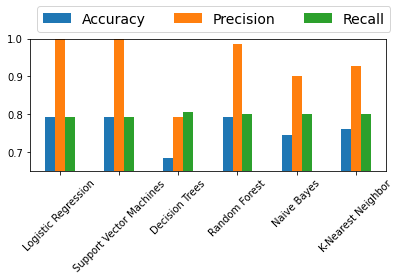

In [58]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
ax.set_ylim((.65,1))
plt.tight_layout()
plt.savefig("scores.png",facecolor="white")

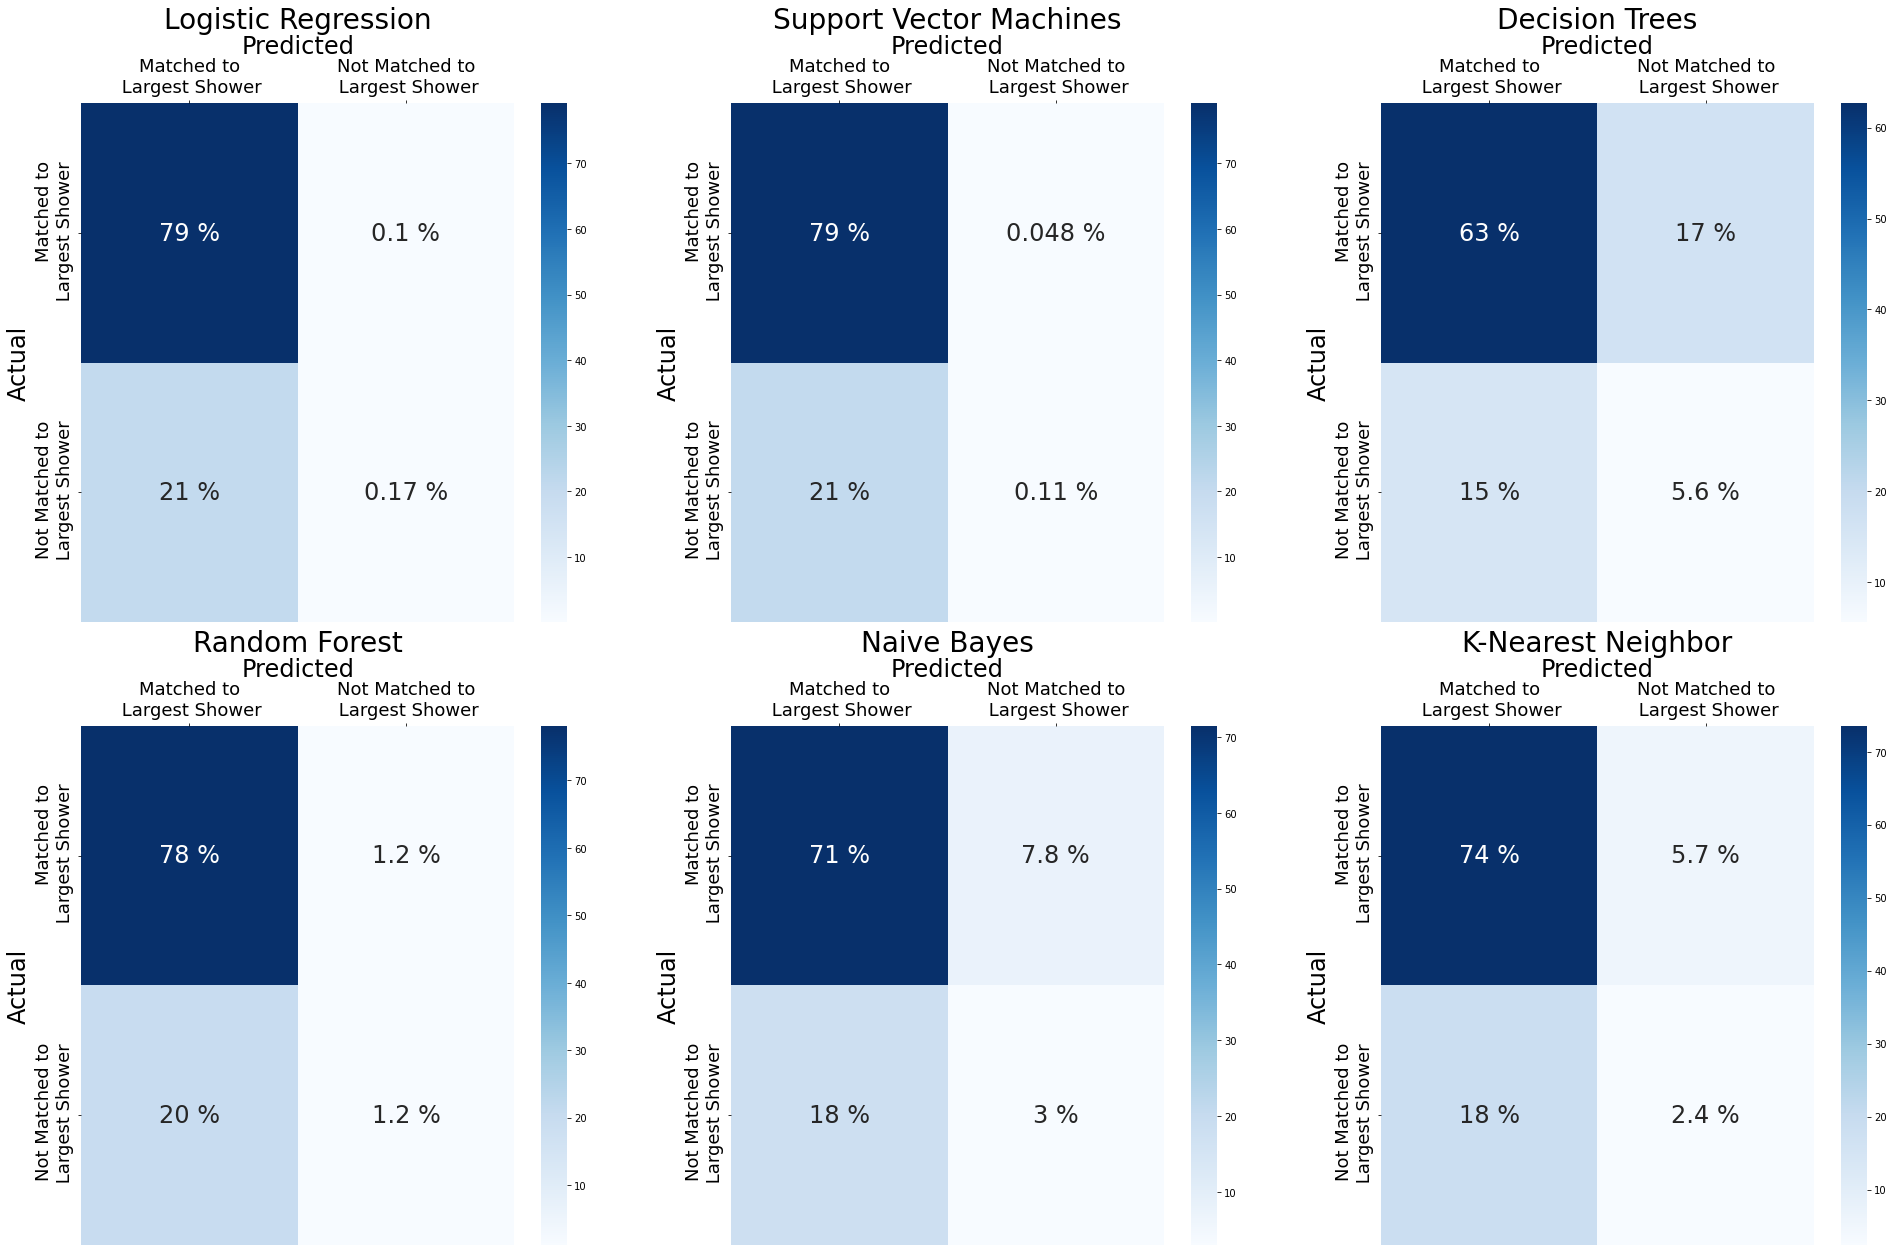

In [63]:
fig,axs = plt.subplots(ncols=3,nrows=2,figsize=(33,21))

c = 0
for row in range(2):
    for column in range(3):
        key = list(models.keys())[c]
        c+=1
        
        ax = axs[row,column]

        cm = matrices[key]
        cm = 100 * cm / np.sum(cm)
        df_cm = pd.DataFrame(cm, index = ["Matched to\n Largest Shower","Not Matched to\n Largest Shower"],
                      columns = ["Matched to\n Largest Shower","Not Matched to Largest\n Shower"])

        ax = sn.heatmap(df_cm, annot=True,ax=ax,cmap="Blues",annot_kws={"size": 24},)
        for t in ax.texts: t.set_text(t.get_text() + " %")

        ax.set_xlabel("Predicted",size=24)
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 
        ax.set_xticklabels(ax.get_yticklabels(), size=18)

        ax.set_ylabel("Actual",size=24,)
        ax.set_title(key,size=28)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=90, size=18)

    
plt.savefig("ConfusionMatrix.png",facecolor='white')